# Problem 1 : Python and Data Exploration

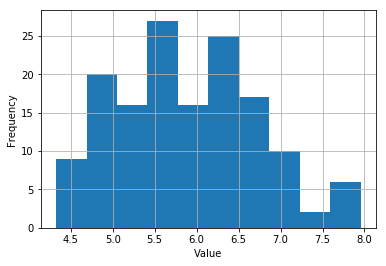

Mean:  5.900103764189188    Standard Deviation:   0.833402066774894


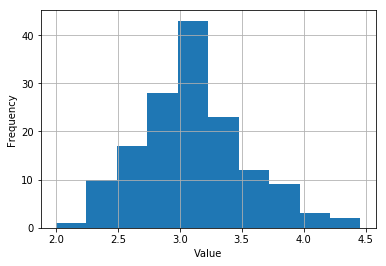

Mean:  3.098930916891892    Standard Deviation:   0.43629183800107685


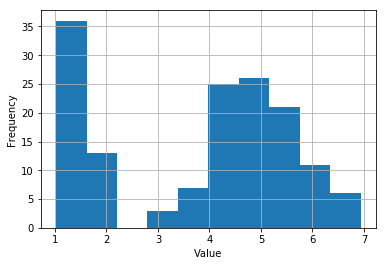

Mean:  3.8195548405405404    Standard Deviation:   1.7540571093439352


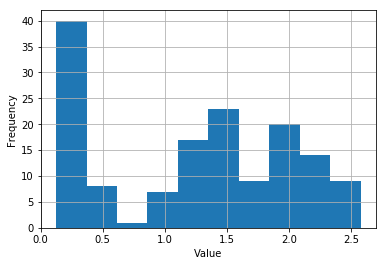

Mean:  1.2525554845945945    Standard Deviation:   0.7587724570263247


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
np.random.seed(0)
if __name__  == "__main__":
    iris=np.genfromtxt("data/iris.txt",delimiter=None)
    Y=iris[:,-1]
    X=iris[:,0:-1]
    numDataPoints=X.shape[0]
    numFeatures=X.shape[1]
    count=0
    while (count<numFeatures):
        x=X[:,count] # get count'th column
        plt.hist(x)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
        mean=np.mean(x)
        std=np.std(x)
        print('Mean: ',mean,'   Standard Deviation:  ',std)
        count+=1

In [4]:
    #Assign colors to classes
    colors=[]
    for y in Y:
        if y==0:
            colors.append('r');
        elif y==1:
            colors.append('b');
        else:
            colors.append('g');

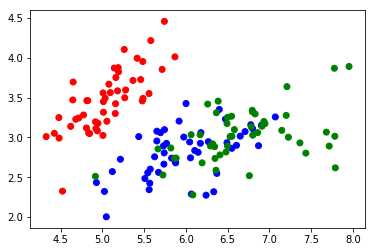

In [5]:
    #Pairwise features scatter plot
    #Different colors for different classes
    f1=X[:,0]
    f2=X[:,1]
    plt.scatter(f1,f2,c=colors)

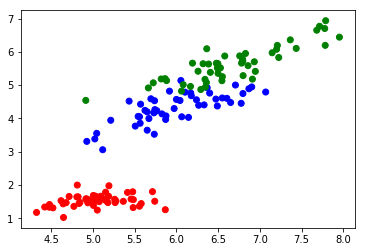

In [6]:
    f1=X[:,0]
    f3=X[:,2]
    plt.scatter(f1,f3,c=colors)

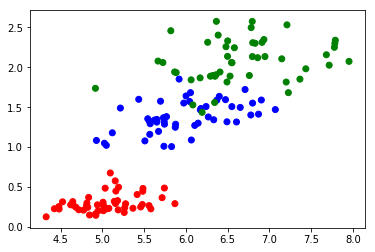

In [7]:
    f1=X[:,0]
    f4=X[:,3]
    plt.scatter(f1,f4,c=colors)

Problem 2: KNN Predictions

In [8]:
    X,Y = ml.shuffleData(X,Y);
    Xtr,Xva,Ytr,Yva = ml.splitData(X[:,0:2],Y, 0.75);

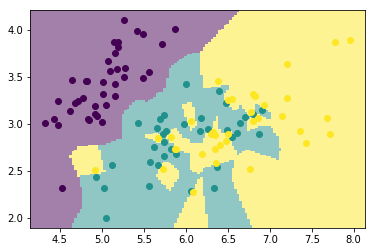

In [9]:
    knn = ml.knn.knnClassify()
    knn.train(Xtr, Ytr, 1)
    YvaHat = knn.predict(Xva) 
    ml.plotClassify2D( knn, Xtr, Ytr );

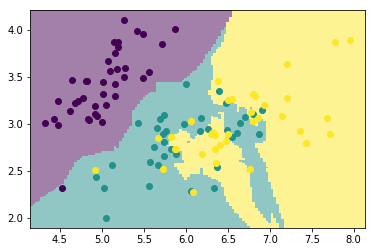

In [10]:
    knn = ml.knn.knnClassify()
    knn.train(Xtr, Ytr, 5)
    YvaHat = knn.predict(Xva) 
    ml.plotClassify2D( knn, Xtr, Ytr );

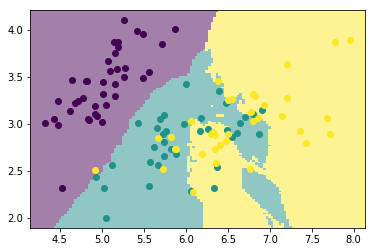

In [11]:
    knn = ml.knn.knnClassify()
    knn.train(Xtr, Ytr, 10)
    YvaHat = knn.predict(Xva) 
    ml.plotClassify2D( knn, Xtr, Ytr );

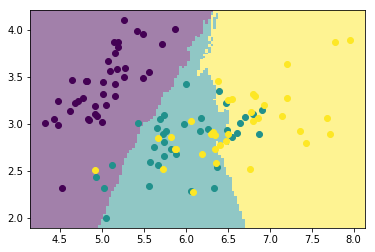

In [12]:
    knn = ml.knn.knnClassify()
    knn.train(Xtr, Ytr, 50)
    YvaHat = knn.predict(Xva) 
    ml.plotClassify2D( knn, Xtr, Ytr );

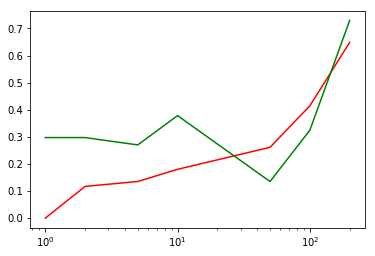

In [13]:
    K=[1,2,5,10,50,100,200];
    errTrain=[]
    errVal=[]
    for k in K:
        learner1=ml.knn.knnClassify()
        learner1.train(Xtr, Ytr, k)
        Yhat = learner1.predict(Xtr)
        differenceCounter=0
        for t in range(0,len(Yhat)):
            if Yhat[t]!=Ytr[t]:
                differenceCounter=differenceCounter+1    
        errTrain.append(differenceCounter/len(Yhat))
        Yval=learner1.predict(Xva)
        differenceCounter=0
        for t in range(0,len(Yval)):
            if(Yval[t]!=Yva[t]):
                differenceCounter=differenceCounter+1
        errVal.append(differenceCounter/len(Yval))
        
    plt.semilogx(K,errTrain,'r')
    plt.semilogx(K,errVal,'g')
    plt.show()        

Value of K I would recommend is 50, since training error is minimum at this point.